In [5]:
import os
import sys
import math

from matplotlib.pyplot import imshow, imread
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt

#Keras:
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

#Custom Functions:
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

from imports.utils.log_progress import log_progress
from imports.utils.visualization import Visualize
from imports.utils.enums import DATA_BASE_PATH, SHAPE
from imports.models.u_net import get_unet

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from imports.models.losses import bce_dice_loss, dice_coeff
from keras.models import load_model, model_from_json

import keras.losses
keras.losses.custom_loss = bce_dice_loss

model = load_model('../saved_models/unet/unet1024_60epochs.h5', custom_objects={'bce_dice_loss': bce_dice_loss,'dice_coeff':dice_coeff})

In [78]:
layers = [layer for layer in model.layers]
layers

In [62]:
shape = (512,768)

from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

im = imread(DATA_BASE_PATH+'/01_train/images/img_1000.png')
im = resize(im,shape)
 
def get_intermediate_layer(n_layer,input_shape=(512,768)):
    new_model = Model(input=[model.layers[0].input], output=[model.layers[n_layer].output])
    activations = new_model.predict(im.reshape(1,input_shape[0],input_shape[1],3))
    shape = (activations.shape[1],activations.shape[2])
    n_kernels = activations.shape[3]
    print("Number of Kernels: " + str(n_kernels))
    n_filters = activations.shape[3]
    fig, axs = plt.subplots(ncols=4,nrows=math.ceil(n_kernels/4),figsize=(20,(n_layer//4)*5))
    k = 0
    for i in range(math.ceil(n_kernels/4)):
        for j in range(4):
            axs[i,j].imshow(activations[0,:,:,k].reshape(shape),cmap="YlGn")
            axs[i,j].axis('off')
            axs[i,j].set_title(f"Outputlayer: {n_layer}, Kernel: {k}")
            k += 1
    plt.subplots_adjust(wspace=0.1, hspace=0.2)

Number of Kernels: 8


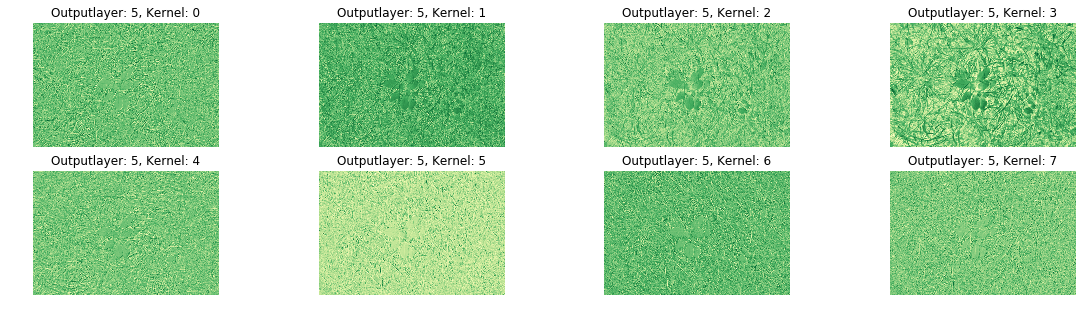

In [80]:
get_intermediate_layer(5)

16


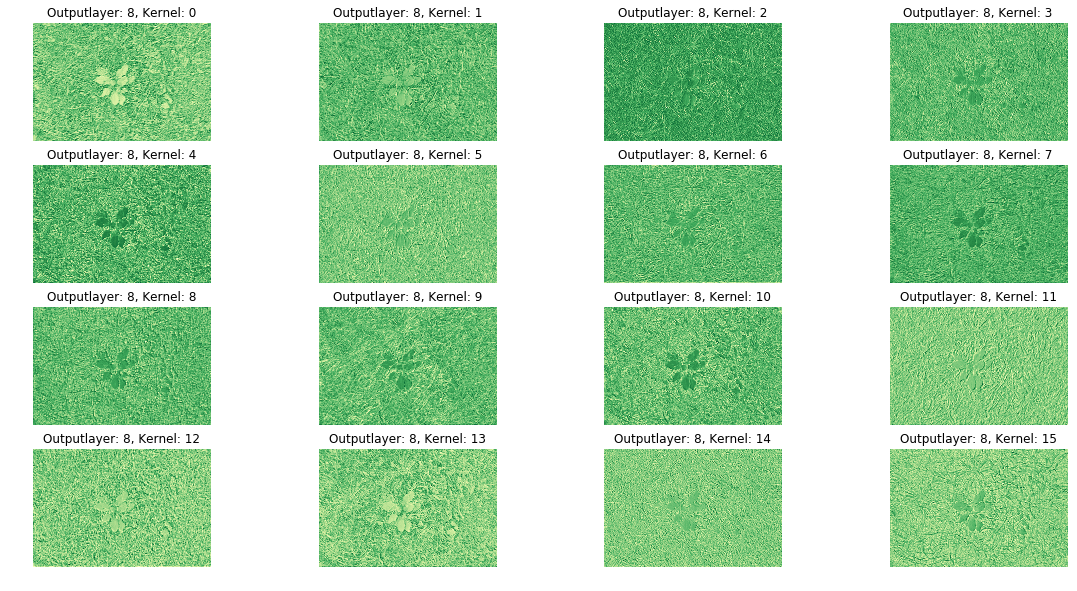

In [57]:
get_intermediate_layer(8)

16


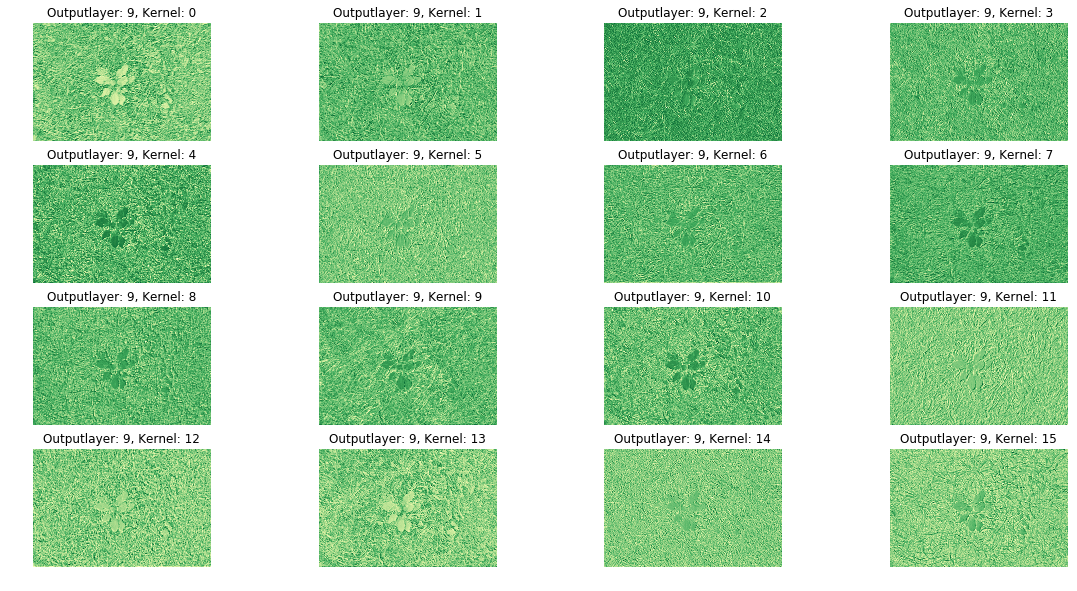

In [58]:
get_intermediate_layer(9)

Number of Kernels: 16


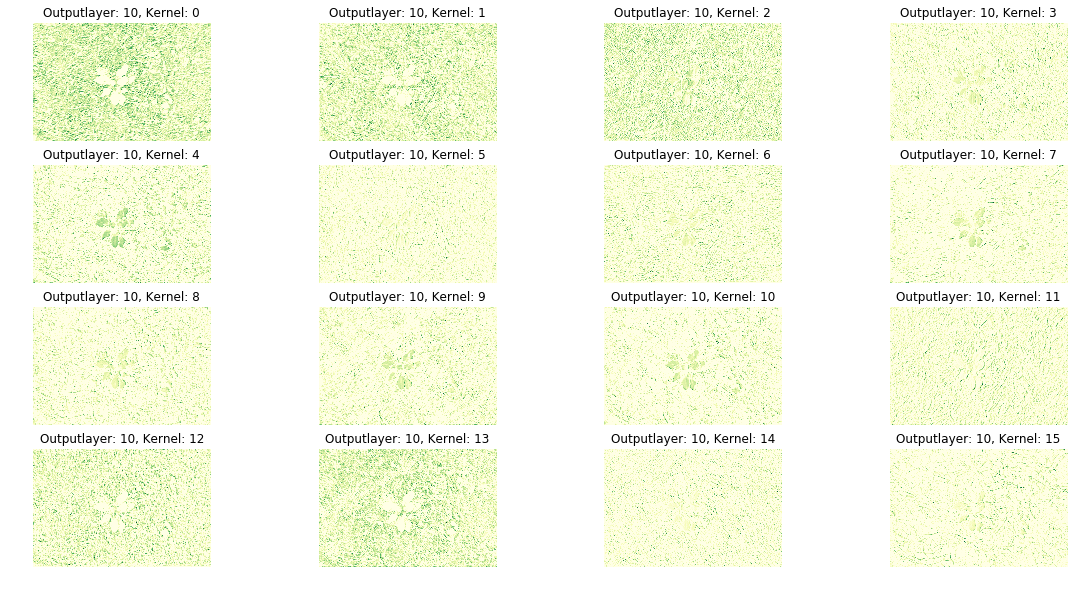

In [63]:
get_intermediate_layer(10)

16


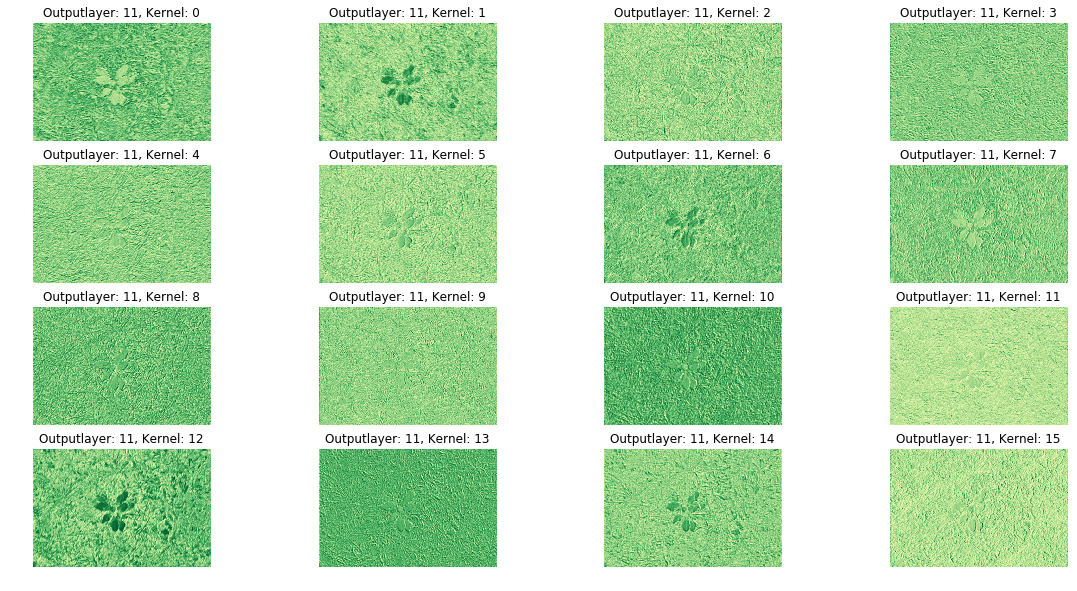

In [60]:
get_intermediate_layer(11)

512


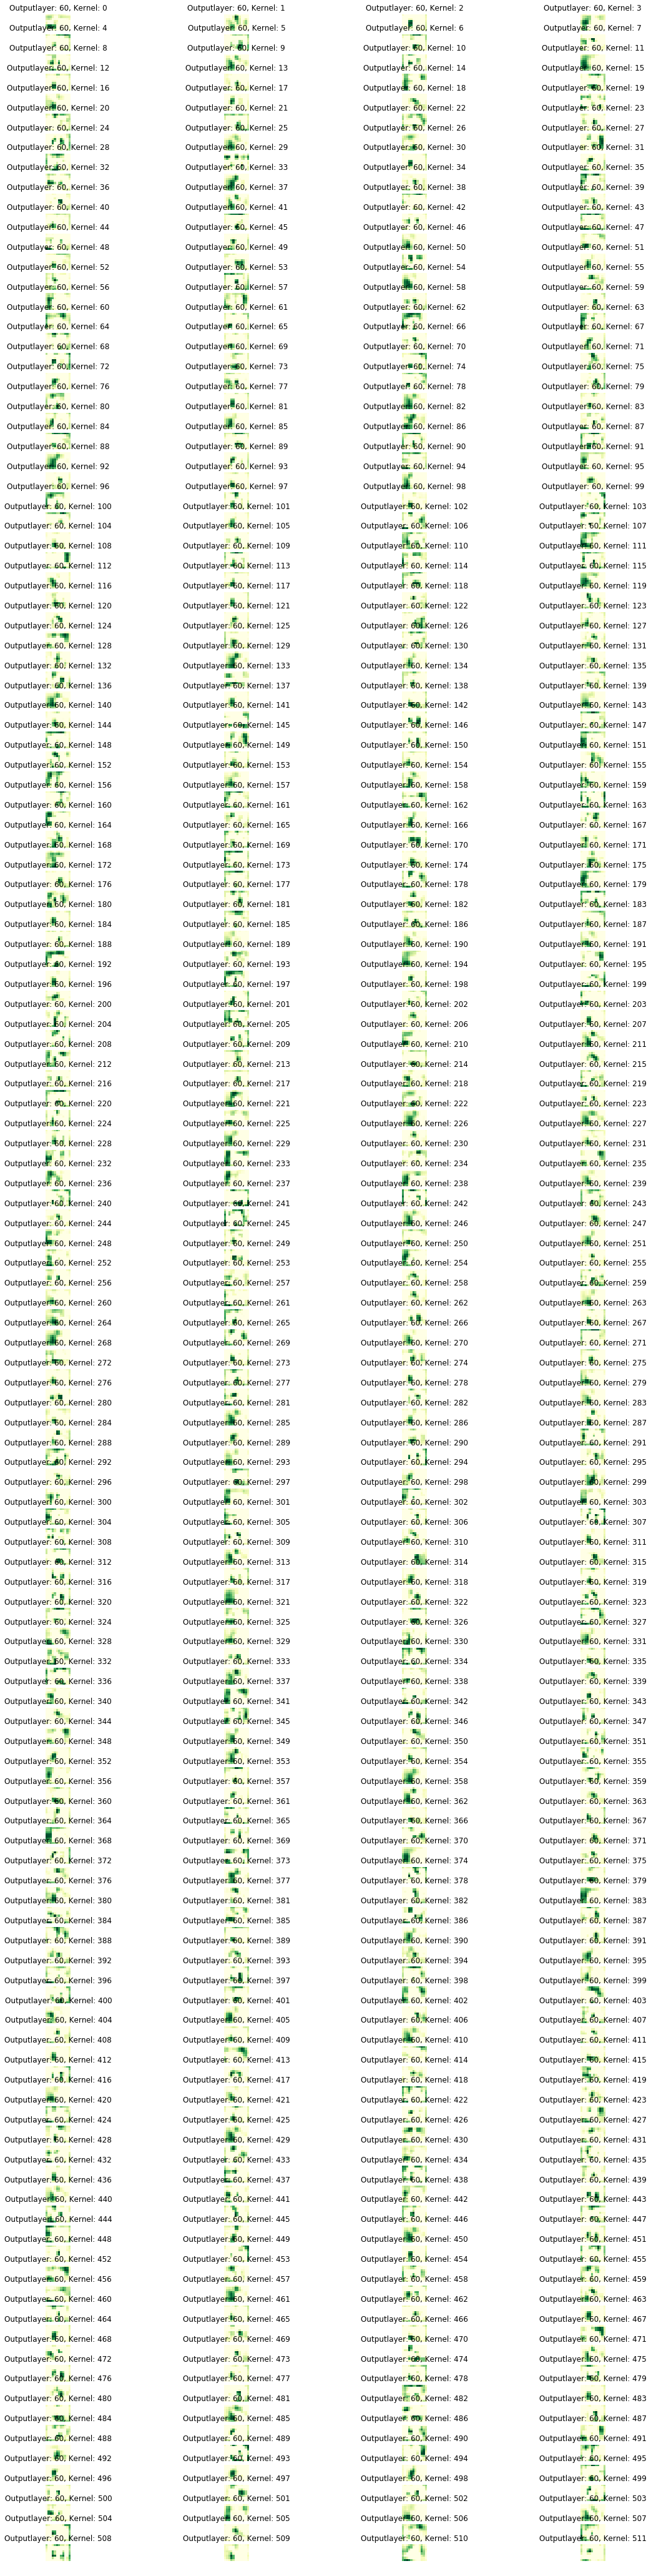

In [61]:
get_intermediate_layer(60)